夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](https://nlp100.github.io/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39は[matplotlib](http://matplotlib.org/)もしくは[Gnuplot](http://www.gnuplot.info/)を用いるとよい．

In [32]:
import MeCab

mecab = MeCab.Tagger()

with open("neko.txt", "r") as f1, open("neko.txt.mecab", "w") as f2:
    lines = f1.readlines()
    for line in lines:
        result = mecab.parse(line)
        f2.write(result)

# 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [33]:
# Mecabの出力形式
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音

with open("neko.txt.mecab", "r") as f:
    lines = f.readlines()
    sentence_list = []
    all_sentence_list = []
    for line in lines:
        dic = {}
        line = line.split("\t")
        if line[0] == "EOS\n":
            continue
        else:
            detail = line[1].split(",")
            dic["surface"] = line[0]
            if len(detail) <= 7:
                dic["base"] = line[0]
            else:
                dic["base"] = detail[6]
            dic["pos"] = detail[0]
            dic["pos1"] = detail[1]
            sentence_list.append(dic)
            if line[0] == "。":
                all_sentence_list.append(sentence_list)
                sentence_list = []

all_sentence_list[0:3]

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'},
  {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
  {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}

# 31. 動詞
動詞の表層形をすべて抽出せよ．

In [34]:
verb = set()
for sentence in all_sentence_list:
    for word in sentence:
        if word["pos"] == "動詞":
            verb.add(word["surface"])
            
print(list(verb)[:10])

['生れ', '窶す', 'むく', '染め出し', '醸す', 'し', '欠く', '悟れ', 'とどめ', '移る']


# 32. 動詞の基本形
動詞の基本形をすべて抽出せよ．

In [35]:
base_verb = set()
for sentence in all_sentence_list:
    for word in sentence:
        if word["pos"] == "動詞":
            base_verb.add(word["base"])

print(list(base_verb)[:10])

['フケる', '諭す', '窶す', 'むく', '惚れ込む', '醸す', 'にたてる', '欠く', '飼う', '移る']


# 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [36]:
noun_phrase = set()
for sentence in all_sentence_list:
    for i in range(1, len(sentence) - 2):
        if (
            sentence[i]["surface"] == "の"
            and sentence[i - 1]["pos"] == "名詞"
            and sentence[i + 1]["pos"] == "名詞"
        ):
            noun_phrase.add(
                sentence[i - 1]["surface"] + "の" + sentence[i + 1]["surface"]
            )

print(list(noun_phrase)[:10])

['ヴァイオリンの稽古', '小倉の袴', '眼窩の奥', '吉利のナイス', '多くの経験', '黒白の変化', '裸体の美人', '床の間の前', '二つの割', '先生の台所']


# 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [37]:
noun_conjunction = set()
for sentence in all_sentence_list:
    text = ""
    count = 0
    for word in sentence:
        if word["pos"] == "名詞":
            text += word["surface"]
            count += 1
        else:
            if count >= 2:
                noun_conjunction.add(text)
            text = ""
            count = 0

print(list(noun_conjunction)[:10])

['ため外出', '折柄', '陣立ていかん', '八つ口', '寒月先生', '成下', '黄白青銭', '臨済録', '一両度三毛子', '君代さん']


# 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [38]:
from collections import Counter

words = []
for sentence in all_sentence_list:
    for word in sentence:
        words.append(word["surface"])

frequency = Counter(words)
print(*frequency.most_common()[:10])

('の', 9194) ('。', 7486) ('て', 6868) ('、', 6772) ('は', 6420) ('に', 6243) ('を', 6071) ('と', 5508) ('が', 5337) ('た', 3988)


# 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

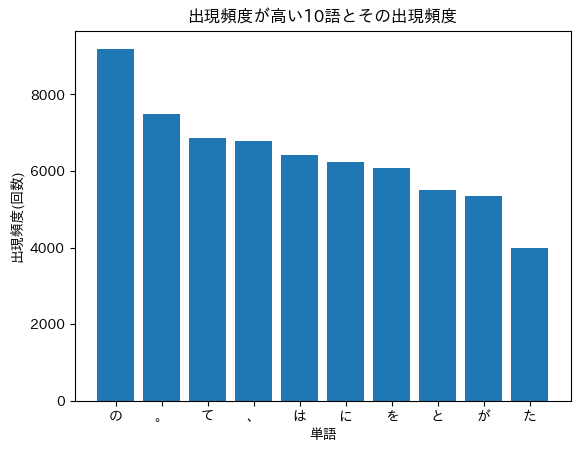

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib

word, count = zip(*frequency.most_common())  # 出現回数順に並べた要素・出現回数のタプルを取得
    
plt.bar(x = word[:10], height = count[:10])
plt.title("出現頻度が高い10語とその出現頻度")
plt.xlabel("単語")
plt.ylabel("出現頻度(回数)")
plt.show()

# 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

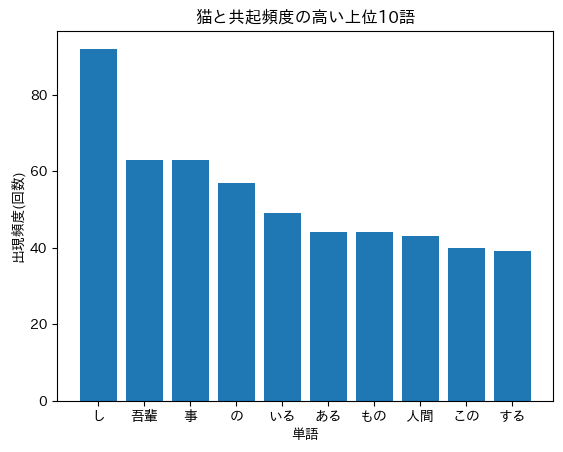

In [40]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
import japanize_matplotlib

neko_list = []
for sentense in all_sentence_list:
    text = []
    Flag = 0
    for word in sentense:
        if "猫" in word["surface"]:
            Flag = 1
            continue
        if word["pos"] not in ["記号","助詞","助動詞"]:
            text.append(word["surface"])
    if Flag == 1:
        neko_list.append(text)

all_neko_list=[]
for lst in neko_list:
    all_neko_list.extend(lst)

frequency=Counter(all_neko_list)

word, count = zip(*frequency.most_common())  # 出現回数順に並べた要素・出現回数のタプルを取得
    
plt.bar(x = word[:10], height = count[:10])
plt.title("猫と共起頻度の高い上位10語")
plt.xlabel("単語")
plt.ylabel("出現頻度(回数)")
plt.show()


# 38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

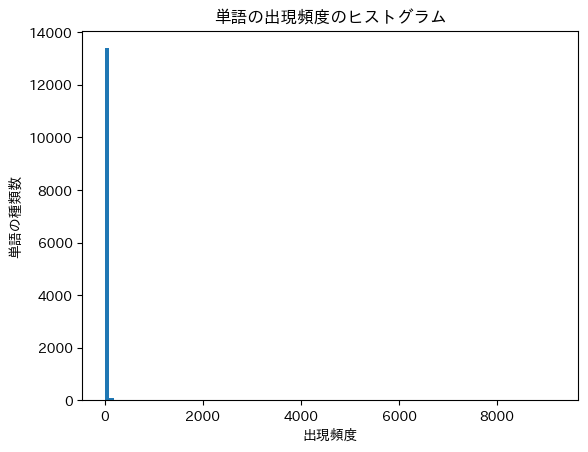

In [41]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
import japanize_matplotlib

words=[]
for sentence in all_sentence_list:
    for word in sentence:
        words.append(word["surface"])

frequency = Counter(words)
    
plt.hist(frequency.values(),bins=100)
plt.title("単語の出現頻度のヒストグラム")
plt.xlabel("出現頻度")
plt.ylabel("単語の種類数")
plt.show()

# 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

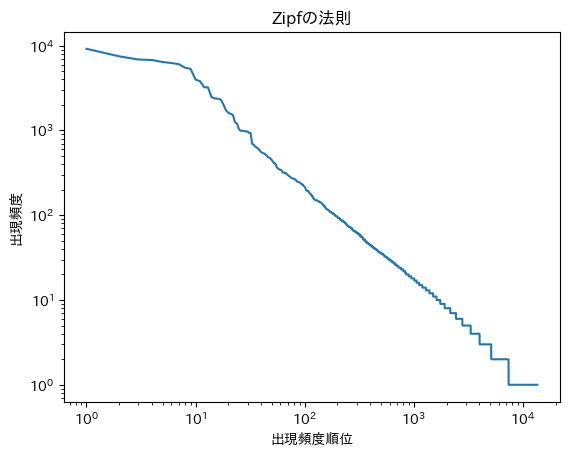

In [42]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
import japanize_matplotlib

words=[]
for sentence in all_sentence_list:
    for word in sentence:
        words.append(word["surface"])

frequency = Counter(words)

frequency_values = sorted((frequency.values()), reverse = True)
rank = range(1, len(frequency_values) + 1)

plt.plot(rank, frequency_values)
plt.xscale('log')
plt.yscale('log')
plt.title("Zipfの法則")
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')

plt.show()